## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../satori')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
df = pd.read_csv('../results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8_from_customTFs/Interactions_SATORI/interactions_summary_attnLimit-0.08.txt',sep='\t')

# For FIS based interactions
#df = pd.read_csv('../results/TAL-GATA_binaryFeat_Analysis_allTFs_euclidean_v8_from_customTFs/Interactions_FIS/interactions_summary_attnLimit-0.3.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [4]:
df.shape

(367, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [5]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

In [6]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [7]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data = df_annotate, single_TF=True)

In [8]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
2,filter1<-->filter10,207,M0942_1.02,0.00523,M0994_1.02,0.003152,354.0,234.0,447.0,851.0,1.110898e-10,2.904831e-09,IRX4,SIX4
7,filter1<-->filter27,224,M0942_1.02,0.00523,M0942_1.02,0.016819,66.0,30.0,267.0,1349.0,2.217727e-04,2.245830e-03,IRX4,IRX4
19,filter1<-->filter61,258,M0942_1.02,0.00523,M4850_1.02,0.003998,282.0,216.0,541.0,1503.0,2.020271e-03,1.621677e-02,IRX4,TCF15
20,filter1<-->filter62,259,M0942_1.02,0.00523,M0199_1.02,0.007158,594.0,504.0,959.0,1998.0,3.818656e-03,2.869578e-02,IRX4,HES2
25,filter1<-->filter78,275,M0942_1.02,0.00523,M0408_1.02,0.003965,246.0,216.0,657.0,1306.0,5.760708e-04,5.263192e-03,IRX4,ZKSCAN1


In [9]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [10]:
df = df[df['TF1']!=df['TF2']]

In [11]:
df.shape

(359, 15)

In [12]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [13]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [14]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter1<-->filter10,207,M0942_1.02,0.00523,M0994_1.02,0.003152,354.0,234.0,447.0,851.0,1.110898e-10,2.904831e-09,IRX4,SIX4,IRX4$\longleftrightarrow$SIX4
1,filter1<-->filter61,258,M0942_1.02,0.00523,M4850_1.02,0.003998,282.0,216.0,541.0,1503.0,2.020271e-03,1.621677e-02,IRX4,TCF15,IRX4$\longleftrightarrow$TCF15
2,filter1<-->filter62,259,M0942_1.02,0.00523,M0199_1.02,0.007158,594.0,504.0,959.0,1998.0,3.818656e-03,2.869578e-02,IRX4,HES2,IRX4$\longleftrightarrow$HES2
3,filter1<-->filter78,275,M0942_1.02,0.00523,M0408_1.02,0.003965,246.0,216.0,657.0,1306.0,5.760708e-04,5.263192e-03,IRX4,ZKSCAN1,IRX4$\longleftrightarrow$ZKSCAN1
4,filter1<-->filter84,281,M0942_1.02,0.00523,M6257_1.02,0.013672,216.0,264.0,902.0,1522.0,3.029695e-17,1.325009e-15,IRX4,GATA5,IRX4$\longleftrightarrow$GATA5


In [15]:
df.shape

(359, 15)

## Most Frequent TF Family Interactions

In [16]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [17]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [18]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [19]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1<-->filter10,207,M0942_1.02,0.00523,M0994_1.02,0.003152,354.0,234.0,447.0,851.0,1.110898e-10,2.904831e-09,IRX4,SIX4,IRX4$\longleftrightarrow$SIX4,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain
1,filter1<-->filter61,258,M0942_1.02,0.00523,M4850_1.02,0.003998,282.0,216.0,541.0,1503.0,2.020271e-03,1.621677e-02,IRX4,TCF15,IRX4$\longleftrightarrow$TCF15,Homeodomain,bHLH,Homeodomain$\longleftrightarrow$bHLH
2,filter1<-->filter62,259,M0942_1.02,0.00523,M0199_1.02,0.007158,594.0,504.0,959.0,1998.0,3.818656e-03,2.869578e-02,IRX4,HES2,IRX4$\longleftrightarrow$HES2,Homeodomain,bHLH,Homeodomain$\longleftrightarrow$bHLH
3,filter1<-->filter78,275,M0942_1.02,0.00523,M0408_1.02,0.003965,246.0,216.0,657.0,1306.0,5.760708e-04,5.263192e-03,IRX4,ZKSCAN1,IRX4$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
4,filter1<-->filter84,281,M0942_1.02,0.00523,M6257_1.02,0.013672,216.0,264.0,902.0,1522.0,3.029695e-17,1.325009e-15,IRX4,GATA5,IRX4$\longleftrightarrow$GATA5,Homeodomain,GATA,Homeodomain$\longleftrightarrow$GATA


In [20]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [21]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1$\longleftrightarrow$filter10,207,M0942_1.02,0.00523,M0994_1.02,0.003152,354.0,234.0,447.0,851.0,1.110898e-10,2.904831e-09,IRX4,SIX4,IRX4$\longleftrightarrow$SIX4,Homeodomain,Homeodomain,Homeodomain$\longleftrightarrow$Homeodomain
1,filter1$\longleftrightarrow$filter61,258,M0942_1.02,0.00523,M4850_1.02,0.003998,282.0,216.0,541.0,1503.0,2.020271e-03,1.621677e-02,IRX4,TCF15,IRX4$\longleftrightarrow$TCF15,Homeodomain,bHLH,Homeodomain$\longleftrightarrow$bHLH
2,filter1$\longleftrightarrow$filter62,259,M0942_1.02,0.00523,M0199_1.02,0.007158,594.0,504.0,959.0,1998.0,3.818656e-03,2.869578e-02,IRX4,HES2,IRX4$\longleftrightarrow$HES2,Homeodomain,bHLH,Homeodomain$\longleftrightarrow$bHLH
3,filter1$\longleftrightarrow$filter78,275,M0942_1.02,0.00523,M0408_1.02,0.003965,246.0,216.0,657.0,1306.0,5.760708e-04,5.263192e-03,IRX4,ZKSCAN1,IRX4$\longleftrightarrow$ZKSCAN1,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
4,filter1$\longleftrightarrow$filter84,281,M0942_1.02,0.00523,M6257_1.02,0.013672,216.0,264.0,902.0,1522.0,3.029695e-17,1.325009e-15,IRX4,GATA5,IRX4$\longleftrightarrow$GATA5,Homeodomain,GATA,Homeodomain$\longleftrightarrow$GATA


In [22]:
df.to_csv('output/TAL-GATA_interactions.csv')

### Distribution of individual TF or TF family interactions

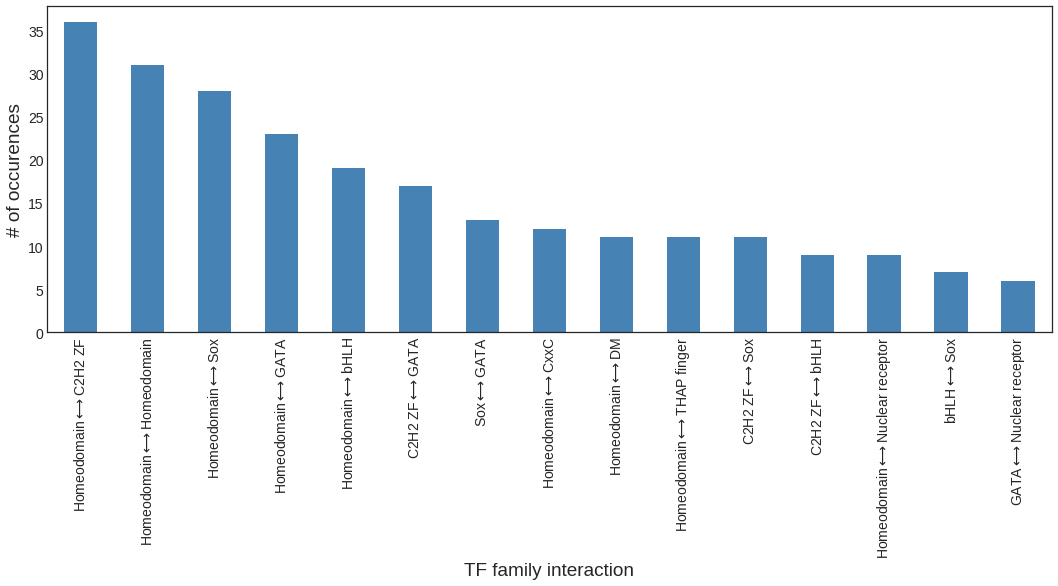

In [23]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

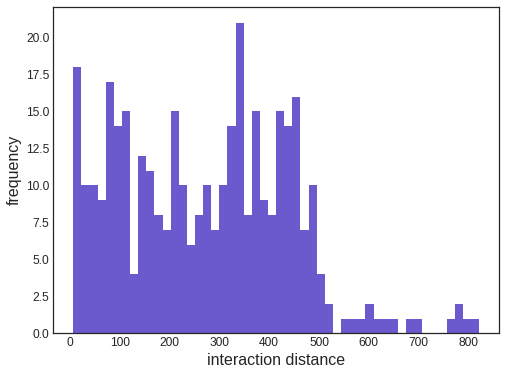

In [24]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [25]:
df['mean_distance'].mean(), df['mean_distance'].median()

(271.7883008356546, 276.0)

### Most frequent interactions and their respective interaction distances

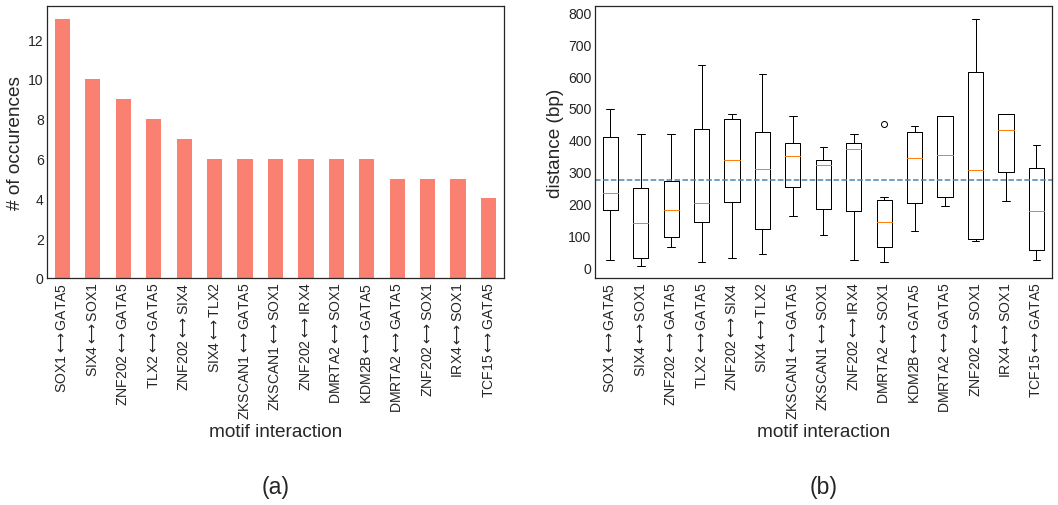

In [26]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_median_dist=True, store_pdf_path='output/TAL-GATA_main_distance_boxplot.pdf')

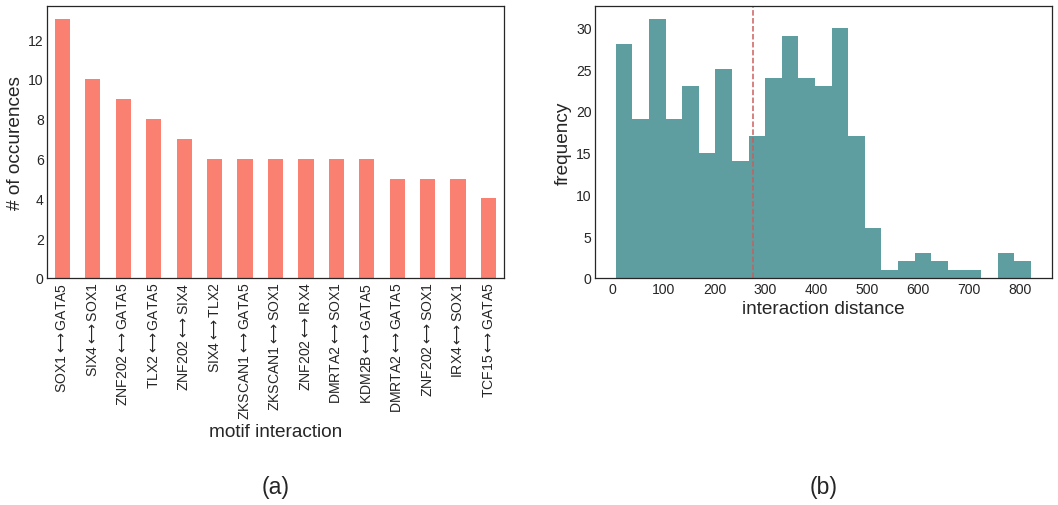

In [27]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_median_dist=True, store_pdf_path='output/TAL-GATA_main_distance_histogram.pdf')

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [28]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/TRUSTv2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [29]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [30]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [31]:
df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval


### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [32]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/jawar/h/nobackup/fahad/Human_Chromatin/Protein-interactions/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [33]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [34]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [35]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [36]:
df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval
124,IRX4$\longleftrightarrow$RXRB,Homeodomain,Nuclear receptor,0.000123
335,KDM2B$\longleftrightarrow$HHEX,CxxC,Homeodomain,0.001875
